In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import datetime
from datetime import date
# Building a predictive model using logistic regression
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
hf=pd.read_csv('Heart_Failure_Details.csv')

In [4]:
hf.head()

,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
0,1,75.0,0,582,0,20,1,265000.00,1.9,1,0,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,1,0,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,1,1,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,1,0,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,0,0,1


In [5]:
hf.tail()

,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
294,295,62.0,0,61,1,38,1,155000.0,1.1,1,1,0
295,296,55.0,0,1820,0,38,0,270000.0,1.2,0,0,0
296,297,45.0,0,2060,1,60,0,742000.0,0.8,0,0,0
297,298,45.0,0,2413,0,38,0,140000.0,1.4,1,1,0
298,299,50.0,0,196,0,45,0,395000.0,1.6,1,1,0


In [6]:
hf.isnull().sum()

S no.                       0
age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
sex                         0
smoking                     0
death                       0
dtype: int64

In [7]:
hf.columns

Index(['S no.', 'age', 'anaemia', 'creatinine phosphokinase', 'diabetes',
       'ejection fraction', 'high bp', 'platelets', 'serum creatinine', 'sex',
       'smoking', 'death'],
      dtype='object')

In [8]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   S no.                     299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    int64  
 3   creatinine phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    int64  
 5   ejection fraction         299 non-null    int64  
 6   high bp                   299 non-null    int64  
 7   platelets                 299 non-null    float64
 8   serum creatinine          299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  death                     299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [9]:
hf.describe()

,S no.,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000,299.00000
mean,150.000000,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,0.648829,0.32107,0.32107
std,86.458082,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,0.478136,0.46767,0.46767
min,1.000000,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,0.000000,0.00000,0.00000
25%,75.500000,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,0.000000,0.00000,0.00000
50%,150.000000,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,1.000000,0.00000,0.00000
75%,224.500000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,1.000000,1.00000,1.00000
max,299.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,1.000000,1.00000,1.00000


In [15]:
# Descriptive Statistics
summary_stats = hf.describe()
categorical_counts = hf['anaemia'].value_counts() 

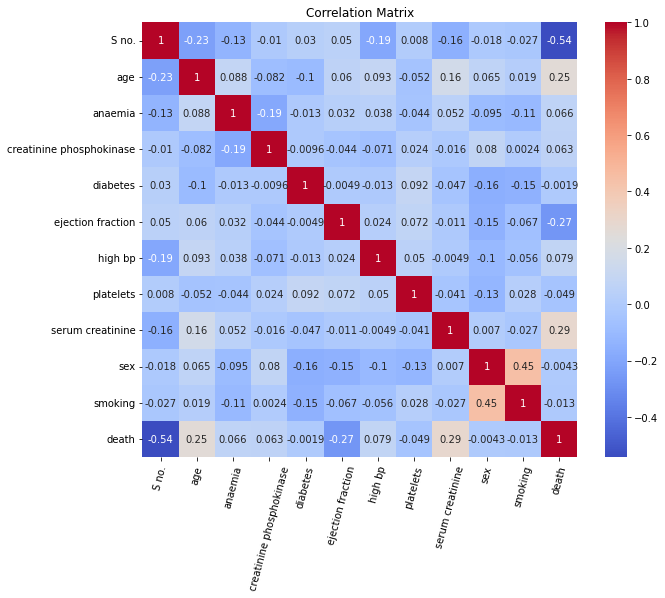

In [25]:
#  Correlation Analysis
correlation_matrix = hf.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)  # Add 'square=True' to make each cell square-shaped

# Adjusting tick labels rotation
plt.xticks(rotation=75)
plt.yticks(rotation=0)

plt.title('Correlation Matrix')
plt.show()

## The column "creatinine phosphokinase" in the dataset refers to the levels of creatinine phosphokinase enzyme in the blood. Creatinine phosphokinase (CPK) is an enzyme found primarily in the heart, brain, and skeletal muscle. Elevated levels of CPK in the blood can indicate muscle damage or injury, including damage to the heart muscle.

# Descriptive Statistics

In [33]:
cpk_stats = hf['creatinine phosphokinase'].describe()
print(cpk_stats)

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine phosphokinase, dtype: float64


## The "good" or normal range of creatinine phosphokinase (CPK) levels in the blood can vary depending on several factors, including age, sex, and overall health. Typically, CPK levels are measured in units per liter (U/L).
## Typically, CPK levels are measured in units per liter (U/L).
## In general, the reference range for total CPK levels in adults is often considered to be around 10 to 120 U/L.

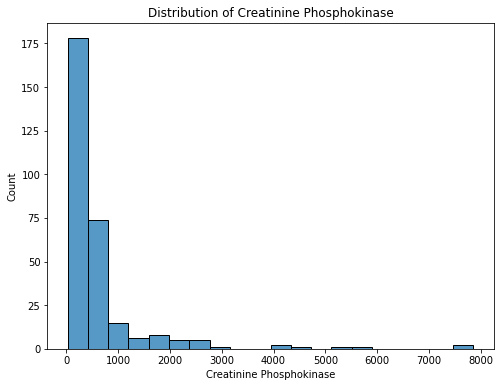

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data=hf, x='creatinine phosphokinase', bins=20)
plt.title('Distribution of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Count')
plt.show()

In [37]:
# Relationship with Other Variables
correlation_matrix = hf.corr()
cpk_corr = correlation_matrix['creatinine phosphokinase']
print(cpk_corr)

S no.                      -0.010046
age                        -0.081584
anaemia                    -0.190741
creatinine phosphokinase    1.000000
diabetes                   -0.009639
ejection fraction          -0.044080
high bp                    -0.070590
platelets                   0.024463
serum creatinine           -0.016408
sex                         0.079791
smoking                     0.002421
death                       0.062728
Name: creatinine phosphokinase, dtype: float64


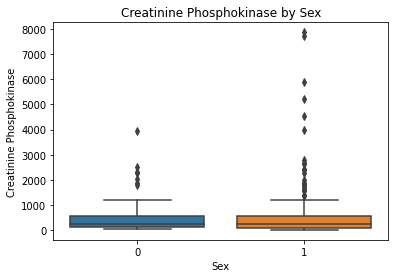

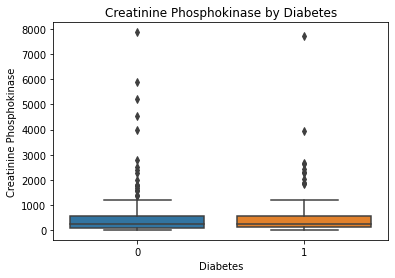

In [39]:
#  Group Analysis
sns.boxplot(data=hf, x='sex', y='creatinine phosphokinase')
plt.title('Creatinine Phosphokinase by Sex')
plt.xlabel('Sex')
plt.ylabel('Creatinine Phosphokinase')
plt.show()

sns.boxplot(data=hf, x='diabetes', y='creatinine phosphokinase')
plt.title('Creatinine Phosphokinase by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Creatinine Phosphokinase')
plt.show()

In [ ]:
Conclusion: In the above Diagram we can see the level of 

# Here we can see Platelet Count according to age group The normal range for platelet count is typically considered to be between 150,000 and 450,000 platelets per microliter of blood

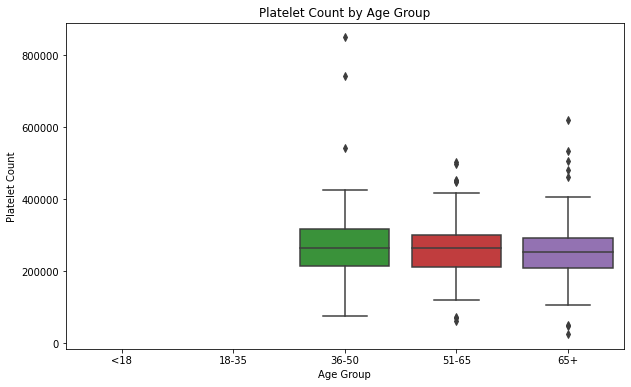

In [47]:
# Age Group Categorization
hf['Age Group'] = pd.cut(hf['age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '36-50', '51-65', '65+'])

# Step 3: Platelet Count Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=hf, x='Age Group', y='platelets')
plt.title('Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()

## Conclusion: This diagram shows those who have a low platelet count, known as thrombocytopenia.
## High Platelet Count (Thrombocytosis): A high platelet count, known as thrombocytosis
## It is important to remember that platelet count abnormalities are not specific to a single condition and can occur in various diseases or situations.        

# Ejection Fraction


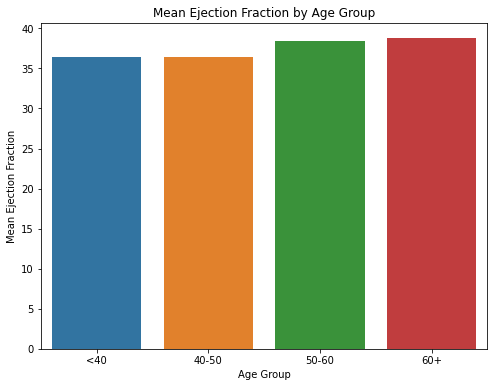

In [49]:
hf['Age Group'] = pd.cut(hf['age'], bins=[0, 40, 50, 60, float('inf')], labels=['<40', '40-50', '50-60', '60+'])

# Step 2: Group the Data and Calculate EF Statistics
ef_by_age_group = hf.groupby('Age Group')['ejection fraction'].mean()  # Or use .median() if preferred

# Step 3: Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=ef_by_age_group.index, y=ef_by_age_group.values)
plt.title('Mean Ejection Fraction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Ejection Fraction')
plt.show()

## Conclusion:Ejection fraction is an important indicator of heart function and can help in the diagnosis and monitoring of various heart conditions, such as heart failure, myocardial infarction (heart attack), cardiomyopathy, and valvular heart disease.

# which age group have more anaemia and diabetes problem.

In [55]:
# Categorize Age into Groups
hf['Age Group'] = pd.cut(hf['age'], bins=[0, 40, 50, 60, float('inf')], labels=['<40', '40-50', '50-60', '60+'])

#  Group the Data and Calculate Frequency of Anemia and Diabetes
age_anemia_counts = hf.groupby('Age Group')['anaemia'].sum()
age_diabetes_counts = hf.groupby('Age Group')['diabetes'].sum()

#  Visualization
fig = go.Figure()

fig.add_trace(go.Bar(x=age_anemia_counts.index, y=age_anemia_counts.values,
                     name='Anemia',
                     marker_color='red'))

fig.add_trace(go.Bar(x=age_diabetes_counts.index, y=age_diabetes_counts.values,
                     name='Diabetes',
                     marker_color='blue'))

fig.update_layout(barmode='group',
                  title='Frequency of Anemia and Diabetes by Age Group',
                  xaxis_title='Age Group',
                  yaxis_title='Frequency')

fig.show()

## Conclusion: Here we see the age wise chances of anemia and diabetes 